

# Project:  TMDB-Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# 1-I selected movies analysise project that  is include ahuge adata  icluded variables like  (id/	imdb_id	/popularity	budget/	revenue	/original_title/	cast/	homepage	/director/	tagline	keywords/	overview/	runtime	genres/	production_companies/	release_date/	vote_count/	vote_average/	release_year/	budget_adj/	revenue_adj)
# 2- i will extract few variables to answers the prposed quastions . these variables will be (revenue - runtime-voting )

# 3- after that i will visulize the data with histogram shapes and determine the realation between two variables (revnue-voting)


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis

# 1-what is the highst revenue ?
# 3-what is the longest movies ?
# 4-what is the shortest movie ?
# 5- what is the realation between voting and revenue ?


# Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
!ls

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [ ]:
df= pd.read_csv('tmdb-movies-Copy1.csv')
df.head()

# <li><a href="#wrangling">Data Wrangling</a></li>


# Determine the dataframe & info like (shape-null-datatype-etc)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
df.shape

(10866, 21)

In [12]:
df.duplicated().any()

True

In [13]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



# CLEANING DATA  

In [14]:
df.drop(['id','original_title','tagline','homepage','imdb_id','popularity','cast','director','keywords'],axis=1 ,inplace=True)

In [15]:
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      budget     revenue                                           overview  \
0  150000000  1513528810  Twenty-two years after the events of Jurassic ...   
1  150000000   378436354  An apocalyptic story set in the furthest reach...   
2  110000000   295238201  Beatrice Prior must confront her inner demons ...   
3  200000000  2068178225  Thirty years after defeating the Galactic Empi...   
4  190000000  1506249360  Deckard Shaw seeks revenge against Dominic Tor...   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow 

In [16]:
df.duplicated().any()

True

In [17]:
df.isnull().sum()

budget                     0
revenue                    0
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
df.fillna(df.mean(), inplace=True)
df.info

<bound method DataFrame.info of           budget     revenue  \
0      150000000  1513528810   
1      150000000   378436354   
2      110000000   295238201   
3      200000000  2068178225   
4      190000000  1506249360   
5      135000000   532950503   
6      155000000   440603537   
7      108000000   595380321   
8       74000000  1156730962   
9      175000000   853708609   
10     245000000   880674609   
11     176000003   183987723   
12      15000000    36869414   
13      88000000   243637091   
14     280000000  1405035767   
15      44000000   155760117   
16      48000000   325771424   
17     130000000   518602163   
18      95000000   542351353   
19     160000000   650523427   
20     190000000   209035668   
21      30000000    91709827   
22     110000000   470490832   
23      40000000   569651467   
24      28000000   133346506   
25     150000000   682330139   
26      68000000   215863606   
27      81000000   403802136   
28      20000000    88346473   
29      

In [19]:
df.count()

budget                  10866
revenue                 10866
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

# I dropped the data that i don't need in the analysise after that i determined the  null values and replaced with average using (fillna and mean) code

# # <li><a href="#eda">Exploratory Data Analysis</a></li>

In [20]:
df=df[df['runtime']>30]

In [21]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

             budget       revenue       runtime    vote_count  vote_average  \
count  1.062500e+04  1.062500e+04  10625.000000  10625.000000  10625.000000   
mean   1.494997e+07  4.072463e+07    104.133082    221.196988      5.959699   
std    3.118046e+07  1.181681e+08     28.521654    581.459197      0.930510   
min    0.000000e+00  0.000000e+00     31.000000     10.000000      1.500000   
25%    0.000000e+00  0.000000e+00     90.000000     17.000000      5.400000   
50%    0.000000e+00  0.000000e+00     99.000000     39.000000      6.000000   
75%    1.600000e+07  2.550451e+07    112.000000    149.000000      6.600000   
max    4.250000e+08  2.781506e+09    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10625.000000  1.062500e+04  1.062500e+04  
mean    2001.226071  1.794059e+07  5.252510e+07  
std       12.819909  3.458879e+07  1.460552e+08  
min     1960.000000  0.000000e+00  0.000000e+00  
25%     1994.000000  0.000000e+00  0.0

In [22]:
plt.style.use('bmh')

# Now will answer the following 2 Quastins :

# Which movie is longest runtime?

# Which movie  is the shortest runtime ?


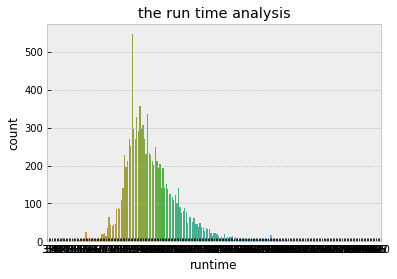

In [23]:
ax = sns.countplot(x=df.runtime, data=df)
ax.set_title("the run time analysis")
plt.show()


# which movie  is the LONGEST runtime ?


In [25]:
print(df.original_title[df.runtime==df.runtime.max()])
print(df.runtime[df.runtime==df.runtime.max()])

AttributeError: 'DataFrame' object has no attribute 'original_title'

# which movie  is the SHORTEST runtime ?

In [26]:
print(df.original_title[df.runtime==df.runtime.min()])
print(df.runtime[df.runtime==df.runtime.min()])

AttributeError: 'DataFrame' object has no attribute 'original_title'

# I determined the longest and the shortest movie frome the maximum and minimum code for runtime variable and i used the hitogame

In [ ]:
ax = sns.countplot(x=df.revenue_adj, data=df)
ax.set_title("revenue analysis")
plt.show()

#  I will answer the following QS

# which movie is highs REVNUE?
# avatar is the highst revnue
  
# which movie is LOWEST REVNUE?
# warrior way is the lowest one


In [28]:
print(df.original_title[df.revenue_adj==df.revenue_adj.min()])
print(df.revenue_adj[df.revenue_adj==df.revenue_adj.min()])

AttributeError: 'DataFrame' object has no attribute 'original_title'

In [ ]:
print(df.original_title[df.revenue_adj==df.revenue_adj.max()])
print(df.revenue_adj[df.revenue_adj==df.revenue_adj.max()])

# ADDATIONAL ANALYSIS ABOUT VOTING .

# Inception got the highest voting


In [ ]:
print(df.original_title[df.vote_count==df.vote_count.max()])
print(df.vote_count[df.vote_count==df.vote_count.max()])

In [ ]:
print(df.original_title[df.vote_count==df.vote_count.min()])
print(df.vote_count[df.vote_count==df.vote_count.min()])

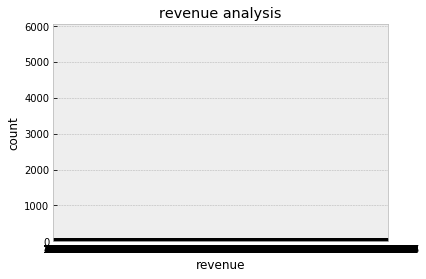

In [29]:
ax = sns.countplot(x=df.revenue, data=df)
ax.set_title("revenue analysis")
plt.show()

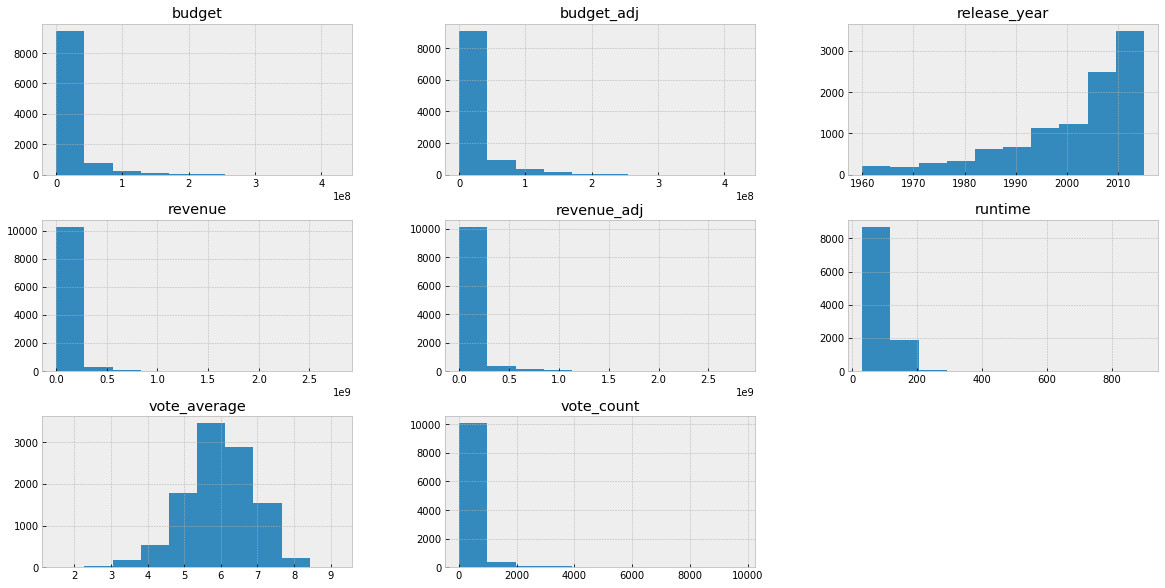

In [30]:
df.hist(figsize=(20,10));

In [ ]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.vote_average)
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.revenue_adj))
ax.set_title("vot&revnue")
plt.show()

In [ ]:
dp=df['production_companies'].str.get_dummies(sep='l')

In [ ]:
dpc=dp[dp.columns].apply(lambda x: sum(x.values))

In [ ]:
pdc.sort_values(0,ascending=False).head(12).plot.pie(outopct='%1.1f',frame=True)
plt.show()

#  "Conclusion"
# I startred my project with importing  libraries and extracted the data from csv file after that  made the next steps 
# data wrangling 
# cleaning data
# visuliza and analyze data 
# answering the questins 
# in the end i got the folowing conclosion :


# avatar is the highest revenue  
# The warrior way is the lowest one

# An Odyssey is the longest runtime

# The Kung Fury is the shortest one


# limitations
- there isn't a clear relation between budget  and revenue (the movie with highest revenue not the movie of the highst budget)
- there isn't a clear relation between voting and revenue  (the movie with highest revenue not the movie of the highst voting )

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])